<a href="https://colab.research.google.com/github/glend21/ML-experiments/blob/main/currencies01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Init


In [5]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

Set up AUDUSD training and test data

Data downloaded from Yahoo Finance. Monthly close from 01/01/2010 to 16/12/2020

In [6]:
usd_train = [0.886289,
0.898796,
0.915583,
0.924813,
0.846597,
0.841326,
0.905223,
0.891822,
0.969368,
0.972763,
0.960707,
1.015775,
0.987362,
1.014497,
1.031917,
1.0939,
1.070297,
1.069267,
1.100001,
1.0676,
0.976467,
1.067395,
1.001803,
1.014096,
1.058604,
1.07996,
1.0351,
1.045631,
0.970497,
1.024097,
1.049869,
1.028098,
1.043765,
1.036602,
1.042938,
1.039199,
1.041884,
1.023227,
1.040875,
1.034404,
0.966931,
0.92816,
0.907276,
0.890234,
0.930146,
0.947032,
0.911328,
0.891981,
0.879585,
0.89617,
0.926012,
0.927472,
0.930925,
0.941708,
0.932575,
0.933445,
0.871688,
0.882457,
0.852442,
0.818398,
0.778877,
0.780579,
0.765814,
0.799488,
0.765814,
0.767283,
0.729448,
0.714082,
0.700378,
0.709019,
0.718391,
0.728491,
0.706864,
0.712809,
0.766107,
0.760688,
0.71958,
0.746993,
0.758783,
0.752445,
0.762835,
0.759821,
0.748447,
0.744823,
0.756544,
0.767636,
0.765521,
0.74672,
0.745935,
0.768521,
0.798594,
0.790701,
0.784628,
0.769764,
0.756659,
0.780823,
0.81011,
0.779362,
0.767813,
0.757518,
0.757117,
0.734646]

usd_test = [
0.74073,
0.726164,
0.722543,
0.709925,
0.732188,
0.704473,
0.725468,
0.714847,
0.708717,
0.705517,
0.690608,
0.700378,
0.687522,
0.673582,
0.676087,
0.689788,
0.67654,
0.700138,
0.670826,
0.65802,
0.616899,
0.655501,
0.66335,
0.687191,
0.720368,
0.7373,
0.714362,
0.703759,
0.740028,
0.75392,
0.756693
]

print( "There are %d training features and %d test features" % (len(usd_train), len(usd_test)))


There are 102 training features and 31 test features


Set up GBP training and test data


In [7]:
gbp_train = [
  0.5544,
0.5918,
0.6027,
0.60425,
0.5826,
0.5626,
0.57625,
0.5763,
0.61338,
0.6163,
0.6178,
0.6579,
0.62373,
0.62969,
0.64201,
0.6567,
0.649,
0.66487,
0.6718,
0.6543,
0.62603,
0.6621,
0.6421,
0.6576,
0.6739,
0.678,
0.64573,
0.642,
0.6265,
0.65184,
0.66805,
0.6509,
0.6412,
0.6447,
0.65,
0.6427,
0.6593,
0.6745,
0.6847,
0.6674,
0.6346,
0.6002,
0.59503,
0.57409,
0.5751,
0.59065,
0.55645,
0.54063,
0.533,
0.53664,
0.556,
0.5511,
0.55496,
0.5526,
0.55128,
0.5624,
0.5364,
0.5514,
0.5404,
0.5256,
0.51647,
0.50638,
0.5168,
0.5182,
0.4996,
0.4876,
0.4674,
0.463,
0.4618,
0.46235,
0.4775,
0.4913,
0.496,
0.5139,
0.5328,
0.52049,
0.49154,
0.5546,
0.57406,
0.574793,
0.5881,
0.621989,
0.599,
0.58398,
0.605235,
0.6169,
0.61332,
0.579141,
0.58225,
0.5905,
0.607531,
0.61185,
0.58565,
0.582603,
0.56387,
0.57773,
0.57223,
0.56037,
0.54897,
0.54993,
0.56991,
0.56054]

gbp_test = [
0.56386,
0.55808,
0.55451,
0.55853,
0.57269,
0.55502,
0.55301,
0.5367,
0.54336,
0.54549,
0.54761,
0.5531,
0.56526,
0.55414,
0.556,
0.53458,
0.522953,
0.53387,
0.51244,
0.507018,
0.49849,
0.52553,
0.540339,
0.55819,
0.5491,
0.5517,
0.55523,
0.542729,
0.55502,
0.56536,
0.56196
]

print( "There are %d GBP training features and %d GBP test features" % (len(gbp_train), len(gbp_test)))


There are 102 GBP training features and 31 GBP test features


Trim the start of the features (and the end of the labels) to slide the input data back one month. This is to test the predictions of the next month's GBP rate based on this month's USD rate

In [8]:
usd_train = usd_train[1:]
gbp_train = gbp_train[:-1]


Define the model and compile it

In [9]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Train the model


Finished training the model


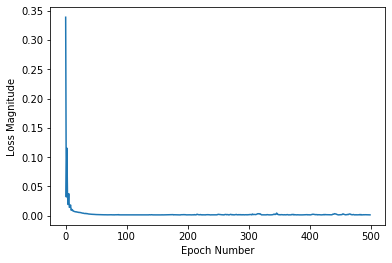

In [10]:
history = model.fit(usd_train, gbp_train, epochs=500, verbose=False)
print("Finished training the model")

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

Predict some values


In [20]:
preds = []
accum = 0.0
for i, dollar in enumerate(usd_test):
  preds.append( model.predict( [dollar] )[0][0] )
  diff = preds[-1] - gbp_test[i]
  perc = (abs(diff) / gbp_test[i]) * 100.0
  accum += perc
  print( "Predict = %.6f, Actual = %.6f, Diff = %.6f [%.2f%%]" 
        % (preds[-1], gbp_test[i], diff, perc) )

print( "mean diff = %.2f%%" % (accum / i) )

Predict = 0.532102, Actual = 0.563860, Diff = -0.031758 [5.63%]
Predict = 0.526709, Actual = 0.558080, Diff = -0.031371 [5.62%]
Predict = 0.525368, Actual = 0.554510, Diff = -0.029142 [5.26%]
Predict = 0.520696, Actual = 0.558530, Diff = -0.037834 [6.77%]
Predict = 0.528939, Actual = 0.572690, Diff = -0.043751 [7.64%]
Predict = 0.518677, Actual = 0.555020, Diff = -0.036343 [6.55%]
Predict = 0.526451, Actual = 0.553010, Diff = -0.026559 [4.80%]
Predict = 0.522519, Actual = 0.536700, Diff = -0.014181 [2.64%]
Predict = 0.520249, Actual = 0.543360, Diff = -0.023111 [4.25%]
Predict = 0.519064, Actual = 0.545490, Diff = -0.026426 [4.84%]
Predict = 0.513544, Actual = 0.547610, Diff = -0.034066 [6.22%]
Predict = 0.517161, Actual = 0.553100, Diff = -0.035939 [6.50%]
Predict = 0.512401, Actual = 0.565260, Diff = -0.052859 [9.35%]
Predict = 0.507239, Actual = 0.554140, Diff = -0.046901 [8.46%]
Predict = 0.508167, Actual = 0.556000, Diff = -0.047833 [8.60%]
Predict = 0.513240, Actual = 0.534580, D

After re-aligning the feature and label arrays so that we are predicting a current GBP rate from a previous USD rate, the error values are noticably reduced.

Graph the predictions vs. actuals of the test data set


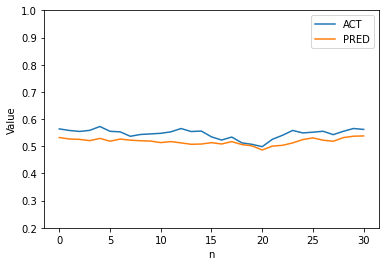

In [28]:
plt.xlabel('n')
plt.ylabel("Value")
plt.ylim( 0.2, 1.0 ) 
plt.plot( gbp_test, label="ACT" )
plt.plot( preds, label="PRED" )
plt.legend()
plt.show()